## Aritmética de punto flotante

Link a conversor __[IEEE 754 precisión simple](https://www.h-schmidt.net/FloatConverter/IEEE754.html)__

_El objetivo de este notebook es acercar a la práctica lo visto en las diapositivas del laboratorio, e ir calentando las aguas para los desafíos que vendran. Usenla en combinación con las diapositivas._

## Una inocente suma

Si hacemos 0.2 + 0.3 en la computadora, esperamos encontrar 0.5 como resultado, ¿pero qué está pasando realmente de fondo? Exploremos más esta operación.

In [1]:
0.25 + 0.3 # El resultado es acorde a lo esperado

0.55

In [2]:
x = 0.3 # Si pedimos que se imprima el valor no se observa nada raro.
print(x)

0.3


Sin embargo, si calculamos la diferencia entre ambos (que debería da 0.1), algo "inesperado" ocurre:

In [3]:
0.3 - 0.25 # El resultado es CASI 0.0.05

0.04999999999999999

_Para pensar_: 
- Escriba el número 0.25 en base 2. ¿Cómo queda expresado en términos de su mantisa y exponente?
- Escriba el número 0.3 en base 2. ¿Qué dificultades aparecen al escribir 0.3 en binario? ¿Se puede escribir exactamente con una mantisa finita?

1) 0.25 es 2^(-2) = 1/4. 
2) Por que es infinita la mantisa? Es un numero periodico finito en base 2. 

Otro ejemplo:

- ¿Cuánto da $(\sqrt{2})^2 - 2$? Simbólicamente sabemos que el resultado es 0, pero...


In [4]:
import numpy as np
np.sqrt(2)**2-2 

np.float64(4.440892098500626e-16)

_Para pensar_: ¿cuántos errores de redondeo se comenten al realizar la operación anterior? ¿Qué operaciones generan el error?

El redondeo sucede, primero en tomar la raiz cuadrada. Luego, se eleva ese numero al cuadrado, que, como redondeamos antes, no va a dar 2 exactamente, va a dar un poco mas o un poco menos. Luego, restarle 2 tambien introduce errores de redondeo, ya que para restar 2 tenemos que representarlo como punto flotante, haciendo que terminemos restando algo levemente distinto de 2.

Un ejemplo más:

- ¿Cuál es el límite cuando $n \rightarrow \infty$ de esta sucesión?
$$
\begin{aligned}
x_1 &= \sqrt{2} \\
x_{n+1} &= \frac{x_n \cdot x_n}{\sqrt{2}}
\end{aligned}
$$

Algebráicamente podemos calcular:

$x_1 = \sqrt{2}$, $x_2 = \frac{x_1 \cdot x_1}{\sqrt{2}} = \frac{2}{\sqrt{2}} = \sqrt{2} = x_1$,

con lo cual podemos concluir que la serie converge en el primer paso, ya que necesariamente será $x_3=x_2=x_1$, etc.

Si lo calculamos con la máquina:

In [5]:
x = np.sqrt(2)
print(x)
l = [x]
for i in range(100):
    x = (x * x) / np.sqrt(2)
    l.append(x)
print(x)

1.4142135623730951
inf


/var/folders/0p/nzkrm49j2pj3s7g4_lftpj4c0000gn/T/ipykernel_2268/4215209067.py:5: RuntimeWarning: overflow encountered in scalar multiply
  x = (x * x) / np.sqrt(2)


Text(0, 0.5, 'Elemento de la sucesión, $x_i$')

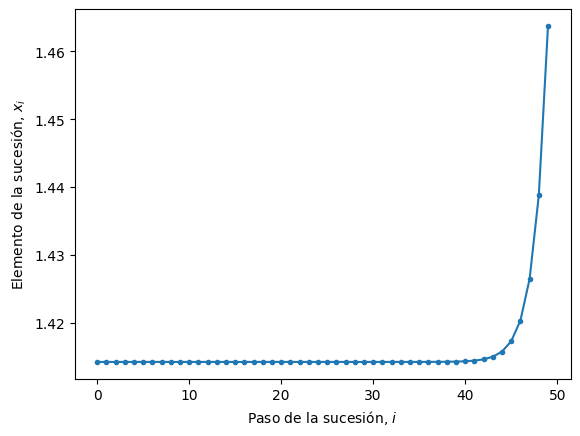

In [6]:
# Si visualizamos la sucesión:
import matplotlib.pyplot as plt
plt.plot(l[:50],marker='.') # Visualizamos los primeros 50 para poder observar el comportamiento
plt.xlabel('Paso de la sucesión, $i$')
plt.ylabel('Elemento de la sucesión, $x_i$')

Pueden ver como desde el paso $40$ el error empieza volverse visible y se dispara muy rápidamente.

In [7]:
np.sqrt(2)/100000 # Preguntar para qué está

np.float64(1.4142135623730951e-05)

Vemos que al dividir por 10^5, el resultado pasa a ser la misma raiz de dos, pero con su exponente a la -5.

In [8]:
10.0**(-3) # Preguntar para qué está

0.001

## Acumulación de errores

1. Se quiere calcular 
$$
\sum_{i=1}^{10^n} \frac{1}{i} \quad y \quad \sum_{i=1}^{5\cdot10^n} \frac{1}{i} 
$$ 
usando aritmética de simple precisión (`float32`). Ejecutar los siguientes programas e interpretar los resultados, observando en particular el resultado para $n=6$ y $n=7$. ¿Qué está ocurriendo?

In [33]:
import numpy as np

n = 6
s = np.float32(0)
for i in range(1,10**n+1):
    s = s + np.float32(1/i)
print("suma = ", s)

s = np.float32(0)
for i in range(1,5*10**n+1):
    s = s + np.float32(1/i)
print("suma = ", s)


suma =  14.357358
suma =  15.403683


A partir de cierto punto, los valores se vuelven demasiado pequeños para que la suma cambie. Por eso el numero termina siendo el mismo a partir de n=7

_Algunas preguntas guía_:
- ¿Cuánto vale $1/i$ en precisión simple cuando $i=2\cdot 10^7$?

    - Vale $2^{-1} \cdot 10^{-7} \approx $

- Si escribimos $1/10^7$ usando el mismo exponente que el necesario para representar a $\sum^{5\cdot 10^6}_{i=1} 1/i$, ¿a cuánto equivale $1/i$?

- ¿Qué modificación podría hacerse para reducir los errores numéricos?

    - Sumas parciales, asi no se arrastra el mismo exponente (??)
    - Aumentar el tamaño de la precision.

In [34]:
# Si invertimos el orden de la sumatoria, el nuevo sumando tiene un orden similar al de la sumatoria previa
s = np.float32(0)
for i in range(2*10**n,0,-1):
    s = s + np.float32(1/i)
print("suma = ", s)

suma =  15.086579


2. Utilizar las mismas estrategias para estimar $e$ mediante la serie
$$
e \approx \sum_{n=0}^{10} \frac{1}{n!}.
$$

Comparar el resultado de cada estrategia con el valor real con el valor real (recordar que existe `np.e`).

In [40]:

import math
sum_e = 0
for i in reversed(range(10)):
    sum_e += 1/math.factorial(i)
print(sum_e)
print(np.e)
print(f"diferencia al reves: {np.e - sum_e}")

sum_e = 0
for i in range(10):
    sum_e += 1/math.factorial(i)
print(sum_e)
print(np.e)
print(f"diferencia: {np.e - sum_e}")



2.7182815255731922
2.718281828459045
diferencia al reves: 3.0288585284310443e-07
2.7182815255731922
2.718281828459045
diferencia: 3.0288585284310443e-07


3. El siguiente código suma 1 $10^8$ veces. ¿Coincide la respuesta con el valor esperado? ¿Es posible modificar el código para calcular el valor correcto?

In [45]:
c = np.float32(0.0)
for i in range(10**8):
    c += np.float32(1)
print(f"Suma en float32: {c}")

# Modificacion :D
c = np.float64(0.0)
for i in range(10**8):
    c += np.float64(1)
print(f"Suma en float64: {c}")


Suma en float32: 16777216.0
Suma en float32: 16777216.0
Suma en float64: 100000000.0


# Características del `float64`

In [44]:
# Máximo número flotante que puede representar Python:
print('Máximo número flotante que puede representar Python: ', np.finfo(float).max, '\n')

# Mínimo flotante positivo normalizado que puede representar Python:
print('Mínimo flotante positivo [normalizado] que puede representar Python: ', np.finfo(float).tiny, '\n')

# Mínimo flotante positivo [subnormal] que puede representar Python:
print('Mínimo flotante positivo [subnormal] que puede representar Python: ', np.nextafter(0., 1.), '\n')

# Epsilon de máquina
print('Epsilon de máquina: ', np.finfo(float).eps)

Máximo número flotante que puede representar Python:  1.7976931348623157e+308 

Mínimo flotante positivo [normalizado] que puede representar Python:  2.2250738585072014e-308 

Mínimo flotante positivo [subnormal] que puede representar Python:  5e-324 

Epsilon de máquina:  2.220446049250313e-16


In [13]:
# Veamos que efectivamente el épsilon de máquina es el número de máquina más chico tal que 1 + eps es distinto de 1

eps = np.finfo(np.double).eps
print('1 + ε =', 1 + eps)
print('1 + ε/2 =', 1 + eps/2,'\n')

print('¿1 + ε = 1?', 1 + eps == 1)
print('¿1 + ε/2 = 1?', 1 + eps/2 == 1)

1 + ε = 1.0000000000000002
1 + ε/2 = 1.0 

¿1 + ε = 1? False
¿1 + ε/2 = 1? True


## Volviendo al 0.1

Vamos a explorar un poco más en detalle cómo representa la máquina al inocente 0.1, y de paso familiarizarnos con algunas funciones de `numpy` más.

In [14]:
print(0.1)
print(f"{np.single(0.1):.17f}") # muestro 17 lugares después de la coma
# format(0.1,'.17f') # hace lo mimso que lo de arriba

0.1
0.10000000149011612


In [50]:
# Si lo representamos con mayor número de decimales, vemos que 0.3 y 0.1+0.2 no son lo mismo
print(f"0.1 + 0.2 = {0.1:.17f} + {0.2:.17f} = {0.1+0.2:.17f}") 
print(f"0.3 = {0.3:.17f}")

0.1 + 0.2 = 0.10000000000000001 + 0.20000000000000001 = 0.30000000000000004
0.3 = 0.29999999999999999


¿Qué entiende la máquina por 0.1?

In [16]:
# Esto devuelve la mantissa como un valor entre -1 y 1 y el exponente del 2 (formato amigable)
np.frexp(np.single(0.1))

(np.float32(0.8), np.int32(-3))

In [17]:
# Chequeo
mantissa, exp = np.frexp(np.single(0.1))
mantissa * 2.**exp

np.float64(0.10000000149011612)

Si les hace ruido que el $0.8$ no está en binario, ¡bien! Lo que pasa es que, en realidad, el 0,8 es 0,[tira de 24 1s y 0s]. Si pedimos que lo represente explicitamente:

In [51]:
mantissa_maquina = mantissa*(2**24) # corro la coma 24 lugares 

print('Mantissa guardada:')
f"{int(mantissa_maquina):b}" # muestro en binario


Mantissa guardada:


'110011001100110011001101'

Aunque en verdad, verdad, no guarda $0,8 . 2^{-3}$ si no $1,6 . 2^{-4}$,

donde el $1$ se asume y lo que se guarda es el $0,6$ en binario con 23 dígitos.

O sea que el primer 1 de arriba no se guarda

In [19]:
print('Mantissa guardada de verdad:')
f"{int(mantissa_maquina):b}"[1:] # muestro en binario

Mantissa guardada de verdad:


'10011001100110011001101'

# Jugando con `float16`

`np.float16` es una versión de punto flotante de 16 bits. 

Se usa 1 bit para el signo, 5 para el exponente y 10 para la mantissa (que recordando el truco del 1 que vimos para `float64`,  puedo emplear 11 digitos signficativos)

In [52]:
# Máximo número flotante que puede representar en float16:
print('Máximo número flotante que puede representar en float16: ', np.finfo(np.float16).max, '\n')

# Mínimo flotante positivo normalizado que puede representar en float16:
print('Mínimo flotante positivo [normalizado] que puede representar en float16: ', np.finfo(np.float16).tiny, '\n')

# Mínimo flotante positivo [subnormal] que puede representar en float16:
print('Mínimo flotante positivo [subnormal] que puede representar en float16: ', np.nextafter(np.float16(0.), np.float16(1.)), '\n')

# Epsilon de máquina
print('Epsilon de máquina: ', np.finfo(np.float16).eps)

Máximo número flotante que puede representar en float16:  65500.0 

Mínimo flotante positivo [normalizado] que puede representar en float16:  6.104e-05 

Mínimo flotante positivo [subnormal] que puede representar en float16:  6e-08 

Epsilon de máquina:  0.000977


Fijense que la precisión es del orden de 0.001. Así que es parecido a trabajar con base 10 y mantissa de 3 digitos

In [56]:
np.nextafter(np.float16(1),np.float16(2))

np.float16(1.001)

A partir de $2^{10} = 1024$ y hasta $2^{11} = 2048$ los números que puedo representar son los enteros

In [57]:
print("El siguiente a 1024 es: ")
np.nextafter(np.float16(1024),np.float16(2000))

El siguiente a 1024 es: 


np.float16(1025.0)

A partir de $2^{11} = 2048$ ya sólo tengo números pares

In [23]:
print("El siguiente a 2048 es: ")
np.nextafter(np.float16(2048),np.float16(2050))

El siguiente a 2048 es: 


np.float16(2050.0)

### Algunos problemas con la representación de 16 bits


In [61]:
# Problema 1: sumar dos números muy distintos en magnitud hace que el más chico sea ignorado
x = np.float16(2048)
y = np.float16(1)
print(f'{x} + {y} = {x + y}')
print(x + y == x)

2048.0 + 1.0 = 2048.0
True


In [62]:
# Problema 1': lo mismo puede pasar si sumamos muchos números chicos
# Acá hago 1 + 1 + 1 + ... 3000 veces
s =  np.float16(0)
for i in range(3000):
    s += np.float16(1)
s

np.float16(2048.0)

In [63]:
# Problema 1'': también si sumamos cosas cada vez más chiquitas

# Hago un doble for para calcular las sumas parciales de 1/n hasta distintos valores
for n in range(200,1001,200):
    s =  np.float16(0)
    for i in range(1,n):
        s += np.float16(1/i)
    print(f'Suma de los primeros {n} terminos de 1/n : {s}')
f'Conclusión: la serie armonica converge a {s} :('

Suma de los primeros 200 terminos de 1/n : 5.86328125
Suma de los primeros 400 terminos de 1/n : 6.64453125
Suma de los primeros 600 terminos de 1/n : 7.0859375
Suma de los primeros 800 terminos de 1/n : 7.0859375
Suma de los primeros 1000 terminos de 1/n : 7.0859375


'Conclusión: la serie armonica converge a 7.0859375 :('

In [27]:
# Problema 2: restar dos números muy parecidos genera cancelaciones catastróficas 
x = 256.22
y = 256.02
flx = np.float16(x)
fly = np.float16(y)

print(f'Cuenta bien: {x} - {y} = {x - y:.2f}')
print(f'En float16: {flx} - {fly} = {flx - fly}')

error = np.float16(abs((x-y)-(flx-fly)))
print('Error = ',error)
print(f'Error relativo = {error:.2f}/{(x-y):.2f} = {error/(x-y):.0%}')

Cuenta bien: 256.22 - 256.02 = 0.20
En float16: 256.25 - 256.0 = 0.25
Errror =  0.05005
Error relativo = 0.05/0.20 = 25%
